In [1]:
import numpy as np
import os
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
import matplotlib.pyplot as plt

from tqdm import tqdm
from time import time
from PIL import Image

from dataset import prepare_dataset
import utils
from utils import get_mean_std
from dataloader import get_datasets, get_loader, loader_dist, show_batch
from model import ResNet
from train import train_net
from test import test_net

import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
data_dir = './FocusPath_Full/'

In [3]:
# prepare_dataset()

In [5]:
# show a single image
# show_dir = os.path.join(data_dir, 'train/1/')
# img_name = os.listdir(show_dir)[35]
# img_path = os.path.join(show_dir, img_name)
# utils.show_img(img_path)

In [4]:
mean, std = get_mean_std()

Calculating mean and std: 100%|██████████| 81/81 [00:34<00:00,  2.33it/s]


In [5]:
train_ds, valid_ds, test_ds = get_datasets(crop_size=512, 
                                           norm=True, 
                                           mean=mean, std=std
                                          )

In [6]:
num_epochs = 40
lr = 0.005
batch_size=64*3

In [7]:
train_loader = get_loader(data_dir + '/train', train_ds, batch_size=batch_size)
val_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=True, num_workers=28, pin_memory=True)

Mapping sample weights: 100%|██████████| 5184/5184 [02:38<00:00, 32.66it/s]


In [2]:
net = ResNet(3, 2)
# load_state_dict for inference should be used on the same devices
# net = nn.DataParallel(net, device_ids=['cuda:0', 'cuda:1', 'cuda:2'])
net = net.to(device)

In [3]:
utils.count_parameters(net)

conv1.bn1.weight 3
conv1.bn1.bias 3
conv1.conv.weight 1176
conv1.bn2.weight 8
conv1.bn2.bias 8
res1.conv1.bn1.weight 8
res1.conv1.bn1.bias 8
res1.conv1.conv.weight 1152
res1.conv1.bn2.weight 16
res1.conv1.bn2.bias 16
res1.conv2.bn1.weight 16
res1.conv2.bn1.bias 16
res1.conv2.conv.weight 2304
res1.conv2.bn2.weight 16
res1.conv2.bn2.bias 16
res1.downscale.weight 128
res1.downscale.bias 16
res2.conv1.bn1.weight 16
res2.conv1.bn1.bias 16
res2.conv1.conv.weight 4608
res2.conv1.bn2.weight 32
res2.conv1.bn2.bias 32
res2.conv2.bn1.weight 32
res2.conv2.bn1.bias 32
res2.conv2.conv.weight 9216
res2.conv2.bn2.weight 32
res2.conv2.bn2.bias 32
res2.downscale.weight 512
res2.downscale.bias 32
bn.weight 512
bn.bias 512
fc2.weight 1024
fc2.bias 2
Total: 21552


In [4]:
utils.test_model(ResNet, input_size=512)

Random batch of size 64 output shape: torch.Size([64, 2])
Forward pass ran in 0.81 seconds


Epoch[0] Train_loss: 0.2194  Val_loss: 0.5034	 Train_acc: 0.8277  Val_acc: 0.7784 LR: 0.00499 time: 53.00
Epoch[1] Train_loss: 0.1941  Val_loss: 0.3818	 Train_acc: 0.8831  Val_acc: 0.8264 LR: 0.00497 time: 44.56
Epoch[2] Train_loss: 0.2907  Val_loss: 0.4173	 Train_acc: 0.8854  Val_acc: 0.8003 LR: 0.00493 time: 46.70
Epoch[3] Train_loss: 0.1882  Val_loss: 0.2789	 Train_acc: 0.9076  Val_acc: 0.8773 LR: 0.00488 time: 44.09
Epoch[4] Train_loss: 0.2295  Val_loss: 0.2966	 Train_acc: 0.9151  Val_acc: 0.8681 LR: 0.00481 time: 45.43
Epoch[5] Train_loss: 0.2030  Val_loss: 0.2609	 Train_acc: 0.9074  Val_acc: 0.8889 LR: 0.00473 time: 42.97
Epoch[6] Train_loss: 0.2039  Val_loss: 0.2705	 Train_acc: 0.9039  Val_acc: 0.8831 LR: 0.00463 time: 46.42
Epoch[7] Train_loss: 0.2097  Val_loss: 0.2635	 Train_acc: 0.9115  Val_acc: 0.8866 LR: 0.00452 time: 44.04
Epoch[8] Train_loss: 0.2251  Val_loss: 0.2704	 Train_acc: 0.9109  Val_acc: 0.8866 LR: 0.00440 time: 47.38
Epoch[9] Train_loss: 0.1667  Val_loss: 0.2860	

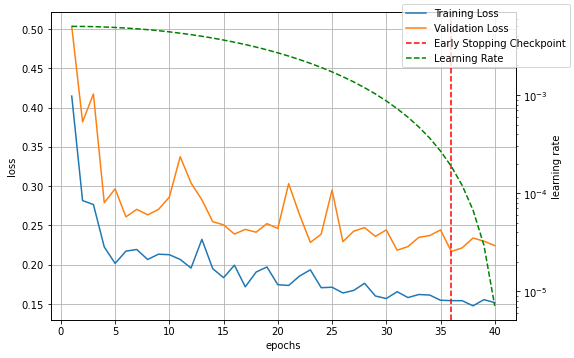

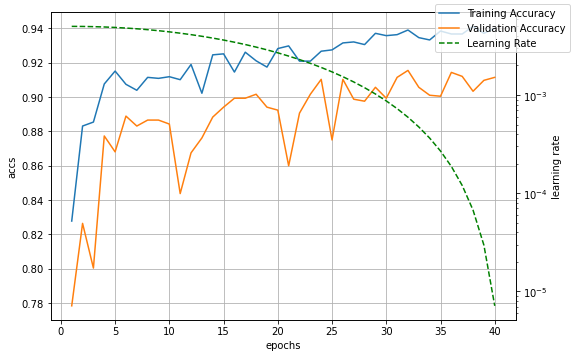

In [11]:
results, lrs = train_net(net, num_epochs, train_loader, val_loader, max_lr=lr)
utils.plot_losses(results, lrs, train_loader, figsize=(8, 5))
utils.plot_accuracies(results, lrs, train_loader, figsize=(8, 5))

In [12]:
test_loader = DataLoader(test_ds, batch_size=1, num_workers=28, pin_memory=True)
accs = test_net(net, test_loader)

Running on test set: 100%|██████████| 1728/1728 [00:13<00:00, 127.38it/s]


Accuracy on test: 0.9062	 Time: 14.63
